In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import numpy
import cv2
from PIL import Image
import seaborn as sns

In [2]:
# Load training data
#the running of this seperate file needs the revision of relative path

train_label_path = './Datasets/cartoon_set/labels.csv'
train_img_path = './Datasets/cartoon_set/img/'
test_label_path = './Datasets/cartoon_set_test/labels.csv'
test_img_path = './Datasets/cartoon_set_test/img/'

dataset = pd.read_csv(train_label_path, sep = "\t")  # read csv file
y_train = dataset['face_shape']
img_name1 = dataset['file_name']

def loadImage(path):
    img = Image.open(path)
    img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)
    median = cv2.resize(img, (64, 64))
    img_resize = Image.fromarray(cv2.cvtColor(median,cv2.COLOR_BGR2RGB))
    img = img_resize.convert("L")
    data = img.getdata()
    return data

x_train = []
for name in img_name1:
    img_path = train_img_path + name # get path
    img = loadImage(img_path)
    x_train.append(img) 

# Load test data
data_test = pd.read_csv(test_label_path, sep = "\t")  # read csv file
y_test = data_test['face_shape']
img_name2 = data_test['file_name']

x_test = []
for name in img_name2:
    img_path = test_img_path + name  
    img = loadImage(img_path)
    x_test.append(img)    

print("Dataset prepared")

Dataset prepared


In [ ]:
# GridSearchCV
'''
param_grid = {'criterion': ['entropy'],
              'max_depth': [35,45,55],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 5, 10]}
grid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid,cv=10)
grid.fit(x_train,y_train)
print('Best Parameter:',grid.best_params_,'Best Score:', grid.best_score_) 
'''

In [3]:
#Importing the Decision tree classifier from the sklearn library.
tree_params={
    'criterion':'entropy',
    'max_depth': 35, 
    'min_samples_leaf': 1,
    'min_samples_split':2
}
clf = tree.DecisionTreeClassifier( **tree_params )

# Cross-validation
'''
for q in range(0,10,1):
    test_size=[0.8,0.6,0.4,0.2,0.05]
    size=test_size[q]
    print("test_size = ",size)
    for p in range(3):
        x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=size)
        clf.fit(x_train_split,y_train_split)
        y_pred = clf.predict(x_val)
        y_pred_training = clf.predict(x_train_split)
        print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_split, y_pred=y_pred_training))
        print('Accuracy Score on test data: ', accuracy_score(y_true=y_val, y_pred=y_pred))
'''

Accuracy Score on test data:  0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       500

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [ ]:
#Training the decision tree classifier on training set.
clf.fit(x_train,y_train)

#Predicting labels on the test set..
y_pred =  clf.predict(x_test)

#Use accuracy metric from sklearn.metrics library
#print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test,y_pred))#text report showing the main classification metrics

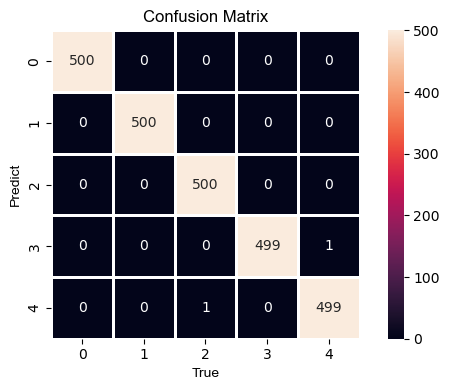

In [4]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
fig, ax = plt.subplots(figsize=(6,4)) 
ax = sns.heatmap(df_cm, 
                annot=True, 
                fmt=".20g", 
                linewidths=2, 
                square=True
                )

ax.set_xlabel('True', family='Arial')
ax.set_ylabel('Predict', family='Arial')
ax.set_title('Confusion Matrix', family='Arial')
plt.tight_layout()
plt.savefig('B1_DT.png', dpi=300)